## Scipy: Special Functions [Source](https://docs.scipy.org/doc/scipy/reference/special.html)

--------

In [1]:
from scipy.special import jn, yn, jn_zeros, yn_zeros
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import seaborn as sns
sns.set()

### Bessel Functions

In [2]:
n = 0 # order
x = 0.0
# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))
x = 1.0
# Bessel function of second kind
print ("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


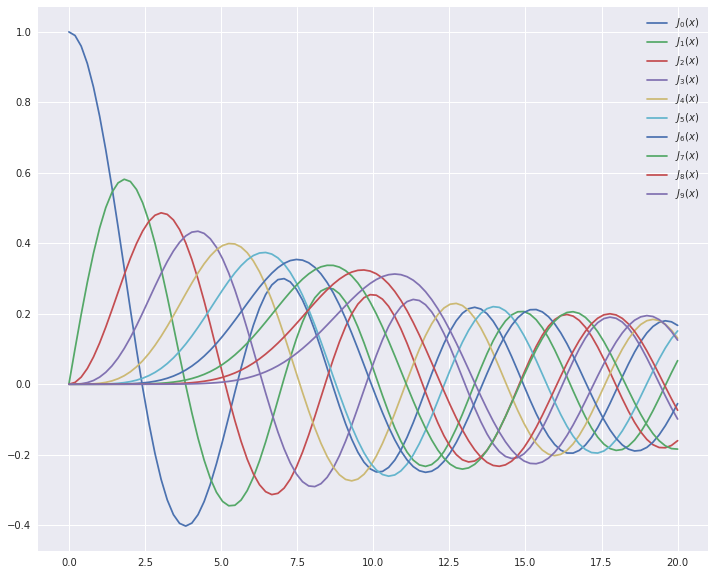

In [6]:
x = np.linspace(0, 20, 100)
plt.figure(figsize = (12,10))
for n in range(10):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
    plt.legend();

### Spherical Harmonics

$Y^m_n(\theta,\phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}}
  e^{i m \theta} P^m_n(\cos(\phi))$

Some Examples

\begin{split}Y_0^0(\theta, \phi) &= \frac{1}{2} \sqrt{\frac{1}{\pi}} \\
Y_1^{-1}(\theta, \phi) &= \frac{1}{2} \sqrt{\frac{3}{2\pi}}
                            e^{-i\theta} \sin(\phi) \\
Y_1^0(\theta, \phi) &= \frac{1}{2} \sqrt{\frac{3}{\pi}}
                         \cos(\phi) \\
Y_1^1(\theta, \phi) &= -\frac{1}{2} \sqrt{\frac{3}{2\pi}}
                         e^{i\theta} \sin(\phi).\end{split}

In [4]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables

#### Y(1,0)

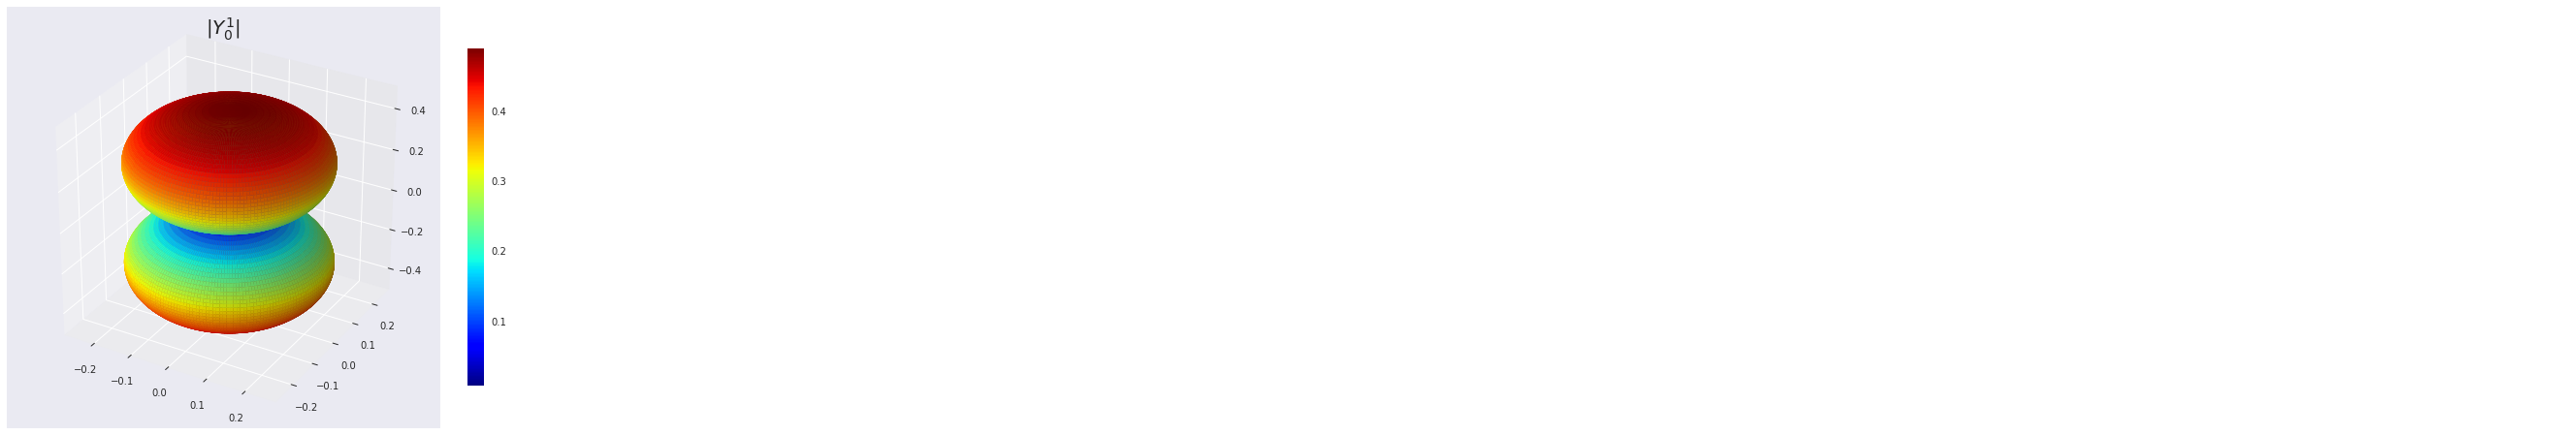

In [73]:
l = 1    #degree
m = 0   #order
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^1_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);


-----------

#### Y(2,1)

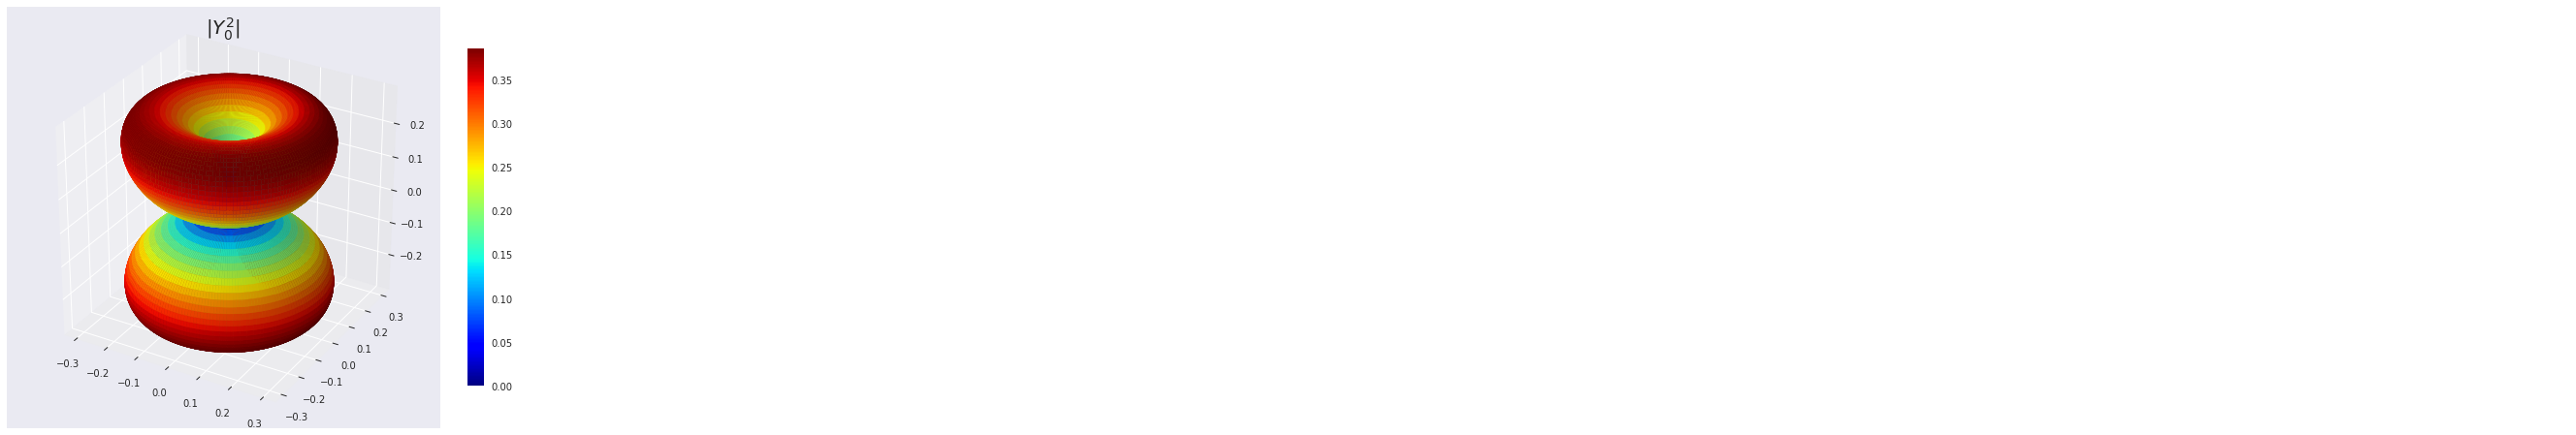

In [65]:
l = 2   #degree
m = 1  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);


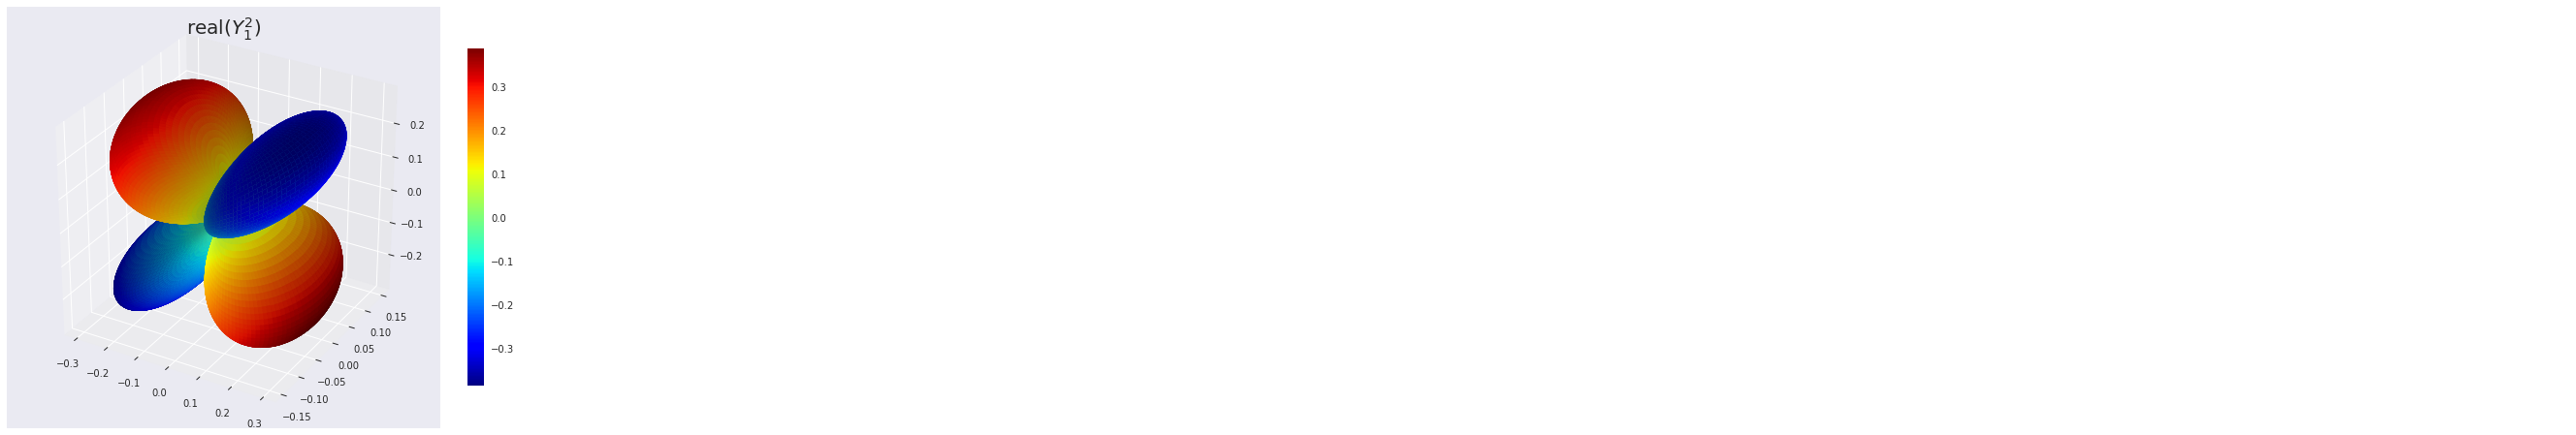

In [71]:
l = 2    # degree
m = 1    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 1)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

-------

#### Y(4,2)

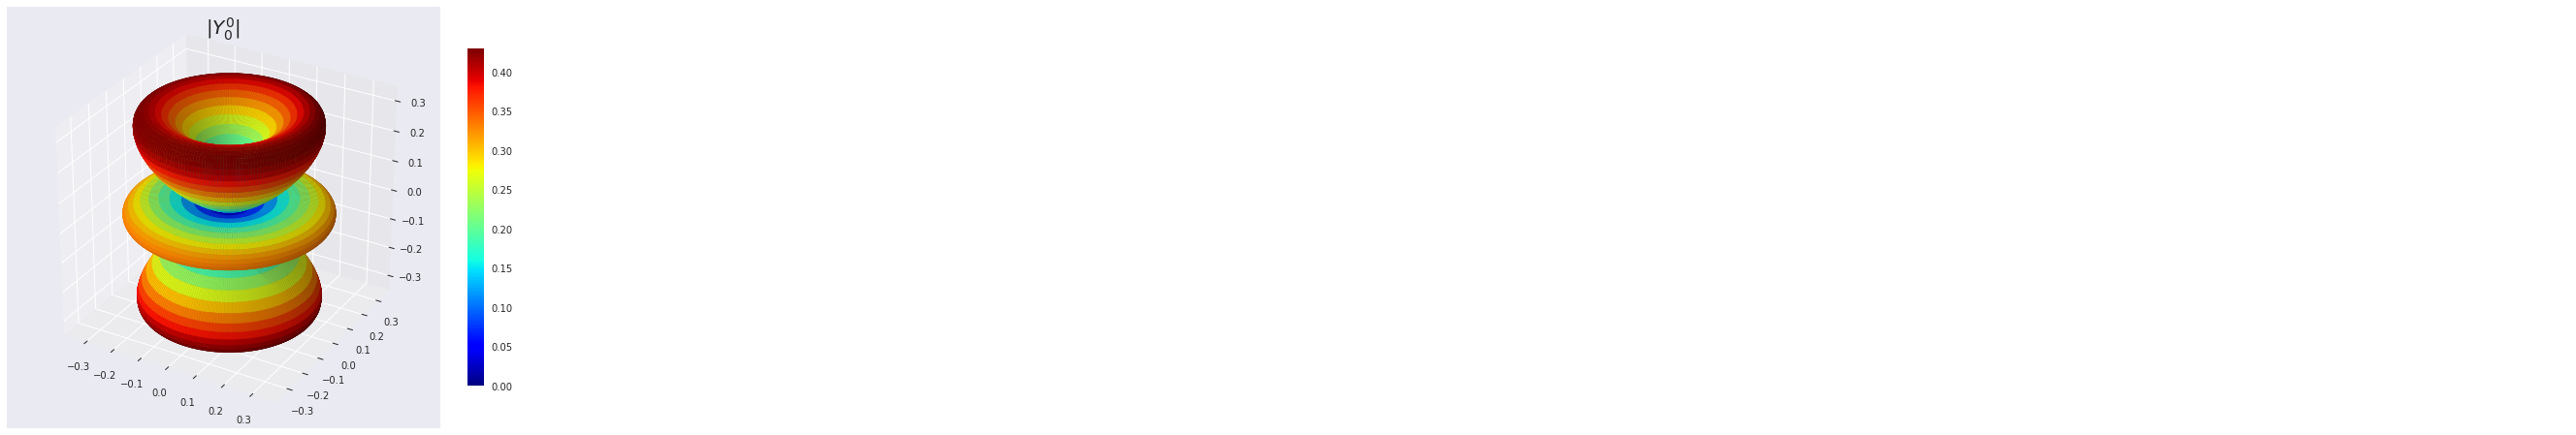

In [70]:
l = 4   #degree
m = 2  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^0_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

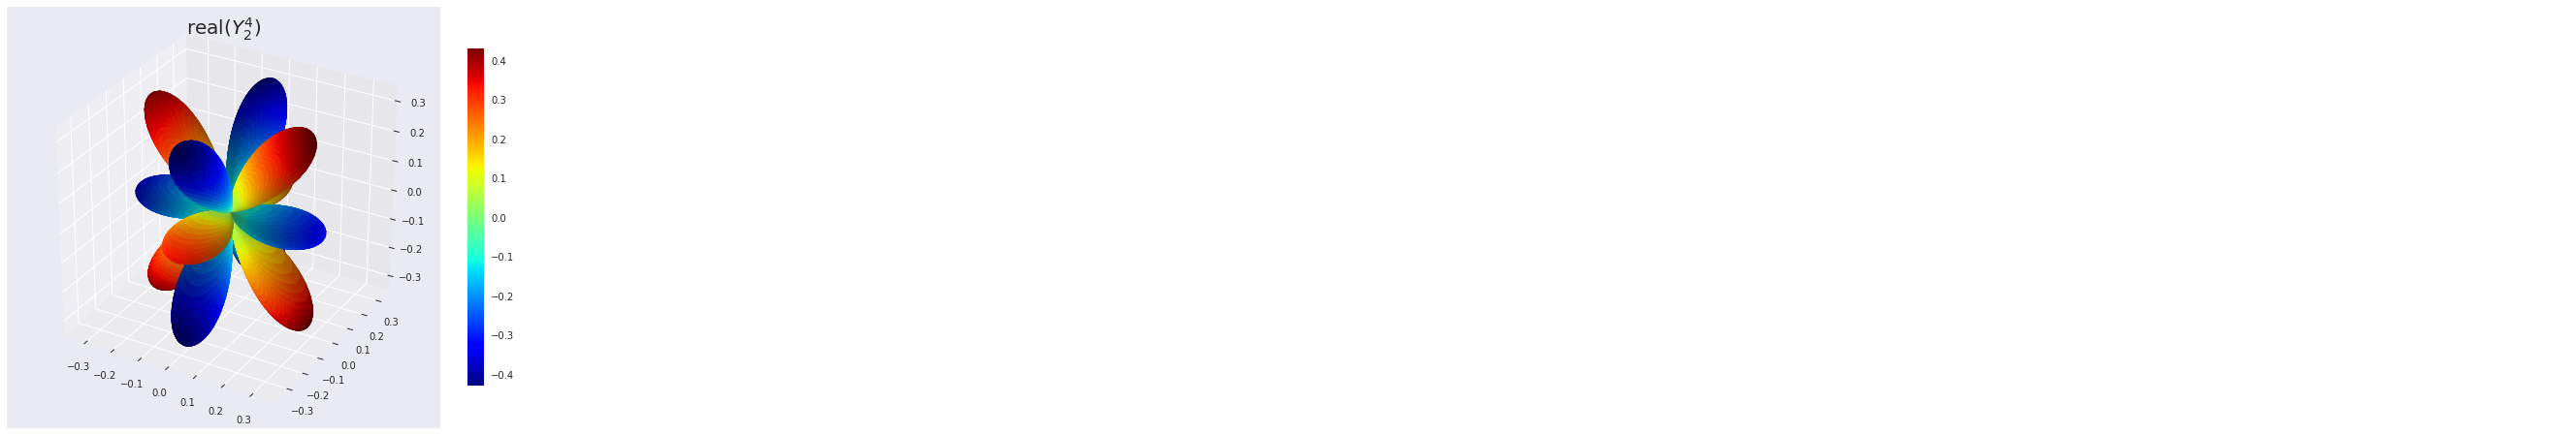

In [69]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^4_ 2)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

-------------------

## Vibrating Circular Membrane

----------------

The vibrations of a thin circular membrane stretched across a rigid circular frame (such as a drum head) can be described as normal modes written in terms of Bessel functions:

$\large{z(r,θ;t)=AJ_n(kr)\sin(nθ)\cos(kνt)}$

where $(r,θ)$ describes a position in polar co-ordinates with the origin at the centre of the membrane, t is time and v is a constant depending on the tension and surface density of the drum. The modes are labelled by integers $n=0,1,⋯ $ and $m=1,2,3,⋯$ where k is the mth zero of $J_n$.

The following program produces a plot of the displacement of the membrane in the n=3,m=2
normal mode at time t=0.

--------

Table |p|q|
---|---|---
![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode01-2.gif) |![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode11-2.gif)|![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode21-2.gif)|
---|---|---
![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode02-2.gif) |![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode31-2.gif)|![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode41-2.gif)|
---|---|---
![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode41-2.gif) |![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode22-2.gif)|![img](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode32-2.gif)|

In [11]:
import numpy as np
from scipy.special import jn, jn_zeros
import pylab
import seaborn as sns
sns.set()

In [12]:
def displacement(n, m, r, theta):
    """
    Calculate the displacement of the drum membrane at (r, theta; t=0)
    in the normal mode described by integers n >= 0, 0 < m <= mmax.

    """

    # Pick off the mth zero of Bessel function Jn
    k = jn_zeros(n, mmax+1)[m]
    return np.sin(n*theta) * jn(n, r*k)

----------

### SIngle Plot

In [51]:
# Allow calculations up to m = mmax
mmax =10
# Positions on the drum surface are specified in polar co-ordinates
r = np.linspace(0, 1, 100)
theta = np.linspace(0, 2 * np.pi, 100)

# Create arrays of cartesian co-ordinates (x, y) ...
x = np.array([rr*np.cos(theta) for rr in r])
y = np.array([rr*np.sin(theta) for rr in r])
# ... and vertical displacement (z) for the required normal mode at
# time, t = 0

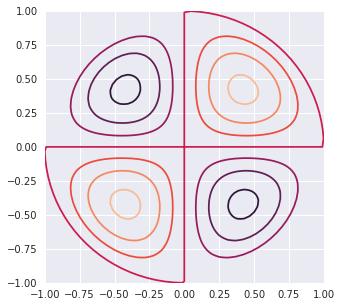

In [52]:
n0, m0 = 2,0
z = np.array([displacement(n0, m0, rr, theta) for rr in r])
plt.figure(figsize = [5,5])
pylab.contour(x, y, z)
pylab.show()

#### 3D plot

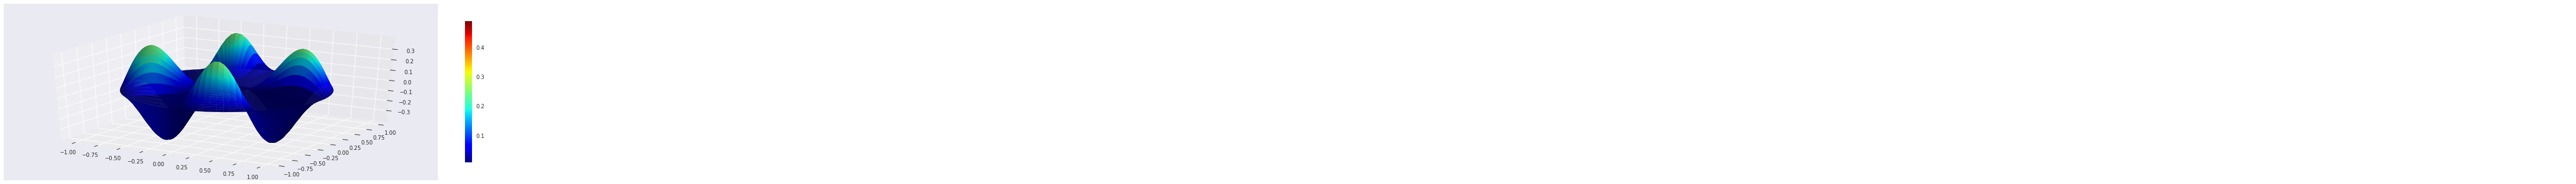

In [59]:
r, theta = np.mgrid[0:1:100j, 0:2*np.pi:100j] 
x = r*np.cos(theta)
y = r*np.sin(theta)
z = displacement(n0, m0, r, theta)
N = z/(z.max() -z.min())
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,6))
im = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(N))
mm = cm.ScalarMappable(cmap=cm.jet)
mm.set_array(R)    
fig.colorbar(mm, shrink=0.8);

------------

### Multiplot

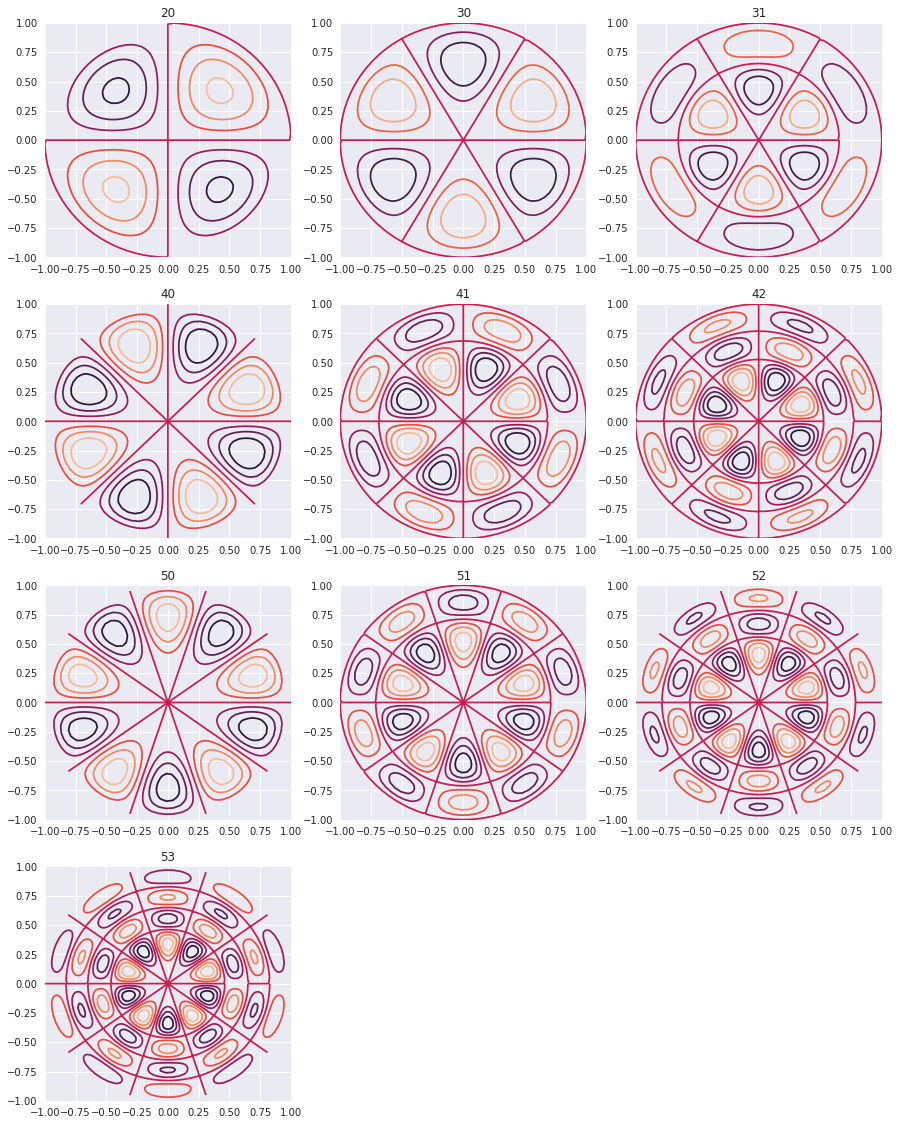

In [87]:
plt.figure(figsize = [15,25])
k = 0
for n in range(6):
    for m in range(n-1):
        k = k+1
        z = np.array([displacement(n, m, rr, theta) for rr in r])
        
        plt.subplot(5,3,k)
        plt.title(str(n) + str(m))
        pylab.contour(x, y, z)
pylab.show()

----------

### m,n = 2,2

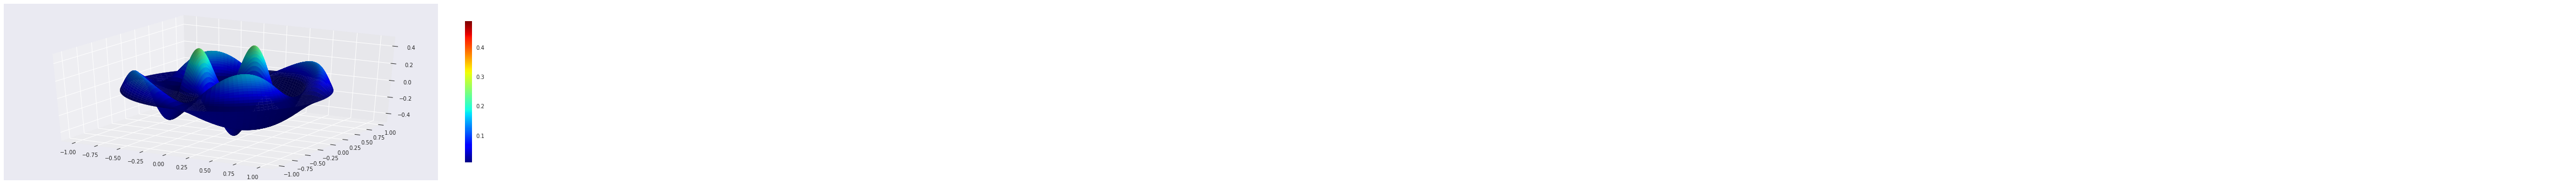

In [64]:
n0,m0 = 2,2
r, theta = np.mgrid[0:1:100j, 0:2*np.pi:100j] 
x = r*np.cos(theta)
y = r*np.sin(theta)
z = displacement(n0, m0, r, theta)
N = z/(z.max() -z.min())
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,6))
im = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(N))
mm = cm.ScalarMappable(cmap=cm.jet)
mm.set_array(R)    
fig.colorbar(mm, shrink=0.8);

------

### References
1. https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
2. https://www.exoruskoh.me/single-post/2017/05/24/Vibrating-Membranes-and-Fancy-Animations
3. https://www.acs.psu.edu/drussell/Demos/MembraneCircle/Circle.html
4. http://balbuceosastropy.blogspot.com/2015/06/spherical-harmonics-in-python.html